# Imports and loading data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install ydata-profiling
from ydata_profiling import ProfileReport
print("done")

done


In [2]:
tiktok_data=pd.read_csv("tiktok_dataset.csv")
influencers_data=pd.read_csv("top influencers.csv")

# Tiktok dataset

## Profiling

### Manual 

In [3]:
print(tiktok_data.shape)

(19382, 11)


In [4]:
print(list(tiktok_data.columns))

['claim_status', 'video_id', 'video_duration_sec', 'video_transcription_text', 'verified_status', 'author_ban_status', 'video_view_count', 'video_like_count', 'video_share_count', 'video_download_count', 'video_comment_count']


In [5]:
tiktok_data.head()


claim_status    video_id  video_duration_sec  \
0        claim  7017666017                  59   
1        claim  4014381136                  32   
2        claim  9859838091                  31   
3        claim  1866847991                  25   
4        claim  7105231098                  19   

                            video_transcription_text verified_status  \
0  someone shared with me that drone deliveries a...    not verified   
1  someone shared with me that there are more mic...    not verified   
2  someone shared with me that american industria...    not verified   
3  someone shared with me that the metro of st. p...    not verified   
4  someone shared with me that the number of busi...    not verified   

  author_ban_status  video_view_count  video_like_count  video_share_count  \
0      under review          343296.0           19425.0              241.0   
1            active          140877.0           77355.0            19034.0   
2            active          902185.0           97690.0             2858.0   
3            active          437506.0          239954.0            34812.0   
4            active           56167.0           34987.0             4110.0   

   video_download_count  video_comment_count  
0                   1.0                  0.0  
1                1161.0                684.0  
2                 833.0                329.0  
3                1234.0                584.0  
4                 547.0                152.0

In [6]:
tiktok_data=tiktok_data.drop(columns=["video_transcription_text"], axis=1)

In [7]:
# Understanding dtypes
tiktok_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_status          19084 non-null  object 
 1   video_id              19382 non-null  int64  
 2   video_duration_sec    19382 non-null  int64  
 3   verified_status       19382 non-null  object 
 4   author_ban_status     19382 non-null  object 
 5   video_view_count      19084 non-null  float64
 6   video_like_count      19084 non-null  float64
 7   video_share_count     19084 non-null  float64
 8   video_download_count  19084 non-null  float64
 9   video_comment_count   19084 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [8]:
categorical=tiktok_data.select_dtypes(include=['object'])
numerical=tiktok_data.select_dtypes(include=['float', 'int'])

# Descriptive statistics
numerical.describe() 

video_id  video_duration_sec  video_view_count  video_like_count  \
count  1.938200e+04        19382.000000      19084.000000      19084.000000   
mean   5.627454e+09           32.421732     254708.558688      84304.636030   
std    2.536440e+09           16.229967     322893.280814     133420.546814   
min    1.234959e+09            5.000000         20.000000          0.000000   
25%    3.430417e+09           18.000000       4942.500000        810.750000   
50%    5.618664e+09           32.000000       9954.500000       3403.500000   
75%    7.843960e+09           47.000000     504327.000000     125020.000000   
max    9.999873e+09           60.000000     999817.000000     657830.000000   

       video_share_count  video_download_count  video_comment_count  
count       19084.000000          19084.000000         19084.000000  
mean        16735.248323           1049.429627           349.312146  
std         32036.174350           2004.299894           799.638865  
min             0.000000              0.000000             0.000000  
25%           115.000000              7.000000             1.000000  
50%           717.000000             46.000000             9.000000  
75%         18222.000000           1156.250000           292.000000  
max        256130.000000          14994.000000          9599.000000

In [9]:
unique = [col for col in tiktok_data.columns if tiktok_data[col].nunique() == len(tiktok_data)]
unique

['video_id']

#### Content Discovery

In [10]:
categorical.head()

claim_status verified_status author_ban_status
0        claim    not verified      under review
1        claim    not verified            active
2        claim    not verified            active
3        claim    not verified            active
4        claim    not verified            active

In [11]:
nulls=tiktok_data.isna().sum()
print("Number of Nulls in Tiktok dataset:\n",nulls)


Number of Nulls in Tiktok dataset:
 claim_status            298
video_id                  0
video_duration_sec        0
verified_status           0
author_ban_status         0
video_view_count        298
video_like_count        298
video_share_count       298
video_download_count    298
video_comment_count     298
dtype: int64


In [12]:
missing_values = tiktok_data[tiktok_data.isna().any(axis=1)]
print("Shape: ", missing_values.shape)

Shape:  (298, 10)


In [13]:
missing_values.head(-1)

claim_status    video_id  video_duration_sec verified_status  \
19084          NaN  4380513697                  39    not verified   
19085          NaN  8352130892                  60    not verified   
19086          NaN  4443076562                  25    not verified   
19087          NaN  8328300333                   7    not verified   
19088          NaN  3968729520                   8    not verified   
...            ...         ...                 ...             ...   
19376          NaN  4099538565                   7    not verified   
19377          NaN  7578226840                  21    not verified   
19378          NaN  6079236179                  53    not verified   
19379          NaN  2565539685                  10        verified   
19380          NaN  2969178540                  24    not verified   

      author_ban_status  video_view_count  video_like_count  \
19084            active               NaN               NaN   
19085            active               NaN               NaN   
19086            active               NaN               NaN   
19087            active               NaN               NaN   
19088            active               NaN               NaN   
...                 ...               ...               ...   
19376            active               NaN               NaN   
19377            active               NaN               NaN   
19378            active               NaN               NaN   
19379      under review               NaN               NaN   
19380            active               NaN               NaN   

       video_share_count  video_download_count  video_comment_count  
19084                NaN                   NaN                  NaN  
19085                NaN                   NaN                  NaN  
19086                NaN                   NaN                  NaN  
19087                NaN                   NaN                  NaN  
19088                NaN                   NaN                  NaN  
...                  ...                   ...                  ...  
19376                NaN                   NaN                  NaN  
19377                NaN                   NaN                  NaN  
19378                NaN                   NaN                  NaN  
19379                NaN                   NaN                  NaN  
19380                NaN                   NaN                  NaN  

[297 rows x 10 columns]

In [14]:
zero_values = (tiktok_data == 0).sum(axis=0)
print("Zero values in each column:")
print(zero_values)



Zero values in each column:
claim_status               0
video_id                   0
video_duration_sec         0
verified_status            0
author_ban_status          0
video_view_count           0
video_like_count           4
video_share_count         99
video_download_count     977
video_comment_count     3434
dtype: int64


In [15]:
duplicates=tiktok_data.duplicated().sum()
print("Number of Duplicates in tiktok dataset: ",duplicates)

Number of Duplicates in tiktok dataset:  0


#### Relationship Discovery

In [16]:
correlation_matrix=numerical.corr()
correlation_matrix

video_id  video_duration_sec  video_view_count  \
video_id              1.000000            0.009025          0.000217   
video_duration_sec    0.009025            1.000000          0.008481   
video_view_count      0.000217            0.008481          1.000000   
video_like_count      0.000236            0.011567          0.804322   
video_share_count    -0.002721            0.011560          0.665635   
video_download_count  0.002155            0.013078          0.664222   
video_comment_count   0.005336            0.000615          0.554172   

                      video_like_count  video_share_count  \
video_id                      0.000236          -0.002721   
video_duration_sec            0.011567           0.011560   
video_view_count              0.804322           0.665635   
video_like_count              1.000000           0.825789   
video_share_count             0.825789           1.000000   
video_download_count          0.823554           0.679910   
video_comment_count           0.687185           0.574632   

                      video_download_count  video_comment_count  
video_id                          0.002155             0.005336  
video_duration_sec                0.013078             0.000615  
video_view_count                  0.664222             0.554172  
video_like_count                  0.823554             0.687185  
video_share_count                 0.679910             0.574632  
video_download_count              1.000000             0.832464  
video_comment_count               0.832464             1.000000

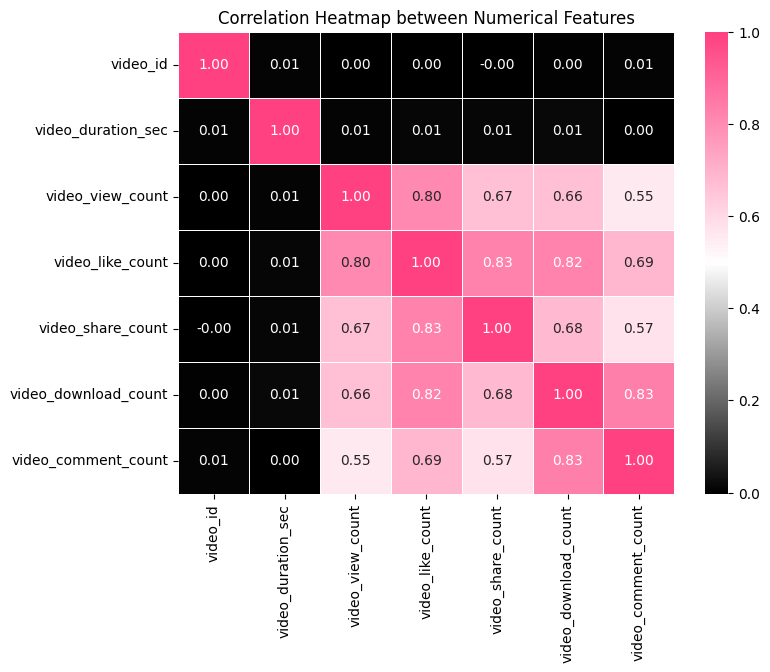

In [17]:
from matplotlib.colors import LinearSegmentedColormap
tiktok_colors = LinearSegmentedColormap.from_list("TikTokColors", ["#000000","#FFFFFF", "#FF4081"])

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap=tiktok_colors, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap between Numerical Features')
plt.show()

In [18]:
for col in categorical:
    print(col+ " values: ",categorical[col].unique())


claim_status values:  ['claim' 'opinion' nan]
verified_status values:  ['not verified' 'verified']
author_ban_status values:  ['under review' 'active' 'banned']


In [19]:
data2=tiktok_data.copy()
data2

claim_status    video_id  video_duration_sec verified_status  \
0            claim  7017666017                  59    not verified   
1            claim  4014381136                  32    not verified   
2            claim  9859838091                  31    not verified   
3            claim  1866847991                  25    not verified   
4            claim  7105231098                  19    not verified   
...            ...         ...                 ...             ...   
19377          NaN  7578226840                  21    not verified   
19378          NaN  6079236179                  53    not verified   
19379          NaN  2565539685                  10        verified   
19380          NaN  2969178540                  24    not verified   
19381          NaN  8132759688                  13    not verified   

      author_ban_status  video_view_count  video_like_count  \
0          under review          343296.0           19425.0   
1                active          140877.0           77355.0   
2                active          902185.0           97690.0   
3                active          437506.0          239954.0   
4                active           56167.0           34987.0   
...                 ...               ...               ...   
19377            active               NaN               NaN   
19378            active               NaN               NaN   
19379      under review               NaN               NaN   
19380            active               NaN               NaN   
19381            active               NaN               NaN   

       video_share_count  video_download_count  video_comment_count  
0                  241.0                   1.0                  0.0  
1                19034.0                1161.0                684.0  
2                 2858.0                 833.0                329.0  
3                34812.0                1234.0                584.0  
4                 4110.0                 547.0                152.0  
...                  ...                   ...                  ...  
19377                NaN                   NaN                  NaN  
19378                NaN                   NaN                  NaN  
19379                NaN                   NaN                  NaN  
19380                NaN                   NaN                  NaN  
19381                NaN                   NaN                  NaN  

[19382 rows x 10 columns]

In [20]:

encoding_dict = {
    "claim_status": {"claim": 1, "opinion": 0, np.nan: -1}, 
    "verified_status": {"not verified": 0, "verified": 1},
    "author_ban_status": {"under review": 0, "active": 1, "banned": 2}
}


# Replacing original columns with encoded values
for col, mapping in encoding_dict.items():
    data2[col] = data2[col].map(mapping)


data2.head()

claim_status    video_id  video_duration_sec  verified_status  \
0             1  7017666017                  59                0   
1             1  4014381136                  32                0   
2             1  9859838091                  31                0   
3             1  1866847991                  25                0   
4             1  7105231098                  19                0   

   author_ban_status  video_view_count  video_like_count  video_share_count  \
0                  0          343296.0           19425.0              241.0   
1                  1          140877.0           77355.0            19034.0   
2                  1          902185.0           97690.0             2858.0   
3                  1          437506.0          239954.0            34812.0   
4                  1           56167.0           34987.0             4110.0   

   video_download_count  video_comment_count  
0                   1.0                  0.0  
1                1161.0                684.0  
2                 833.0                329.0  
3                1234.0                584.0  
4                 547.0                152.0

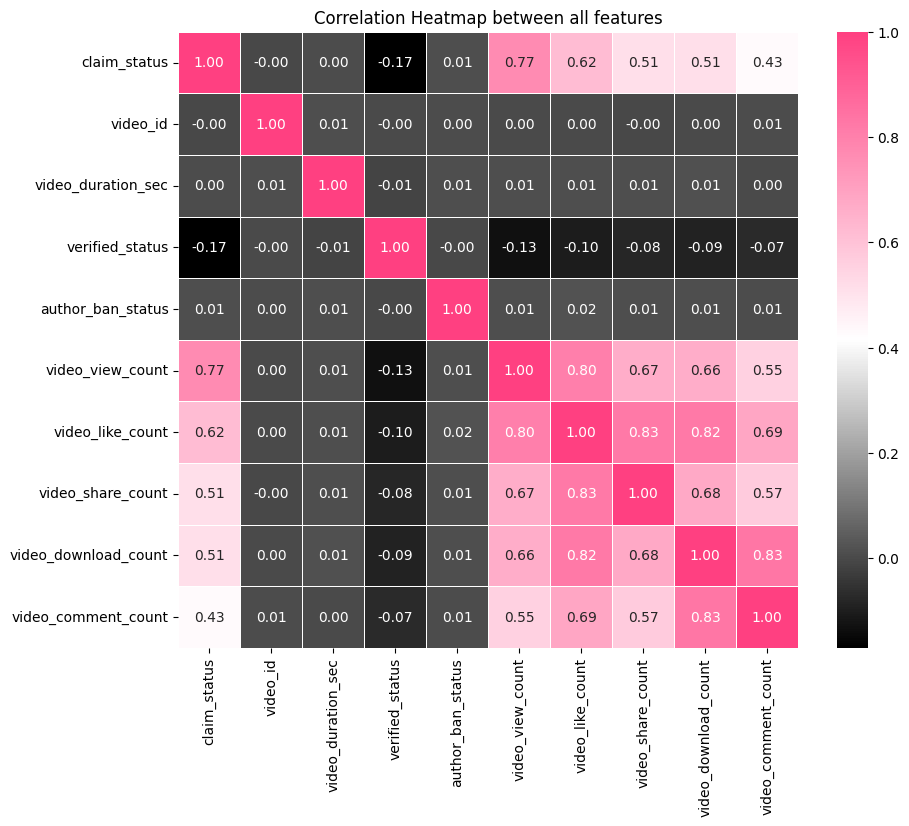

In [21]:
correlation_matrix=data2.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=tiktok_colors, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap between all features')
plt.show()

### Using Pandas Profiling

In [22]:
profile = ProfileReport(tiktok_data, title="Tiktok Dataset Profiling")
profile.to_notebook_iframe()
profile.to_file("tiktok_dataset_profile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Data Wrangling

In [23]:
tiktok_data=tiktok_data.dropna()
tiktok_data.isna().sum()

claim_status            0
video_id                0
video_duration_sec      0
verified_status         0
author_ban_status       0
video_view_count        0
video_like_count        0
video_share_count       0
video_download_count    0
video_comment_count     0
dtype: int64

In [24]:
numerical=tiktok_data.select_dtypes(include=['float', 'int'])

In [25]:
def boxplot(column):
    plt.figure(figsize=(10, 6)) 
    ax = sns.boxplot(data= tiktok_data, x=numerical[f"{column}"], color="#EE1D52")  
    plt.title(f"Checking for outliers in {column}", fontsize=16)  
    plt.xlabel(column, fontsize=14)  
    plt.show()

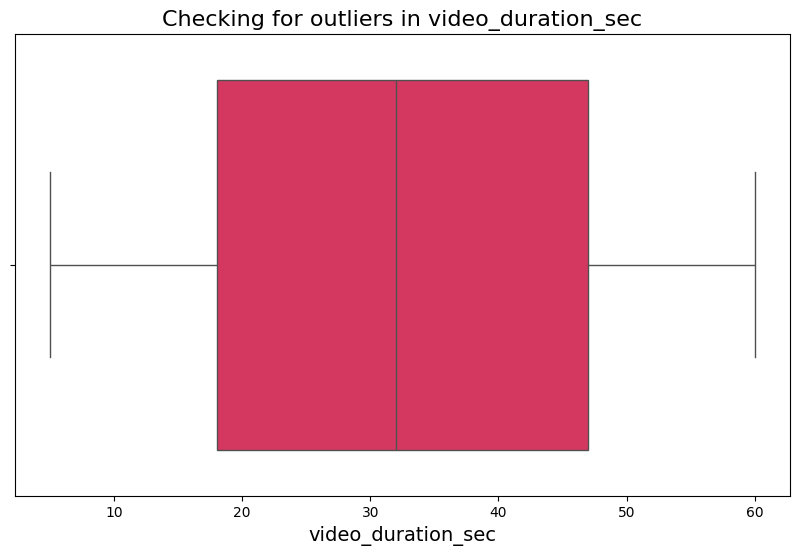


--------------------------------------------------------------------------------------------------------------------------------------------



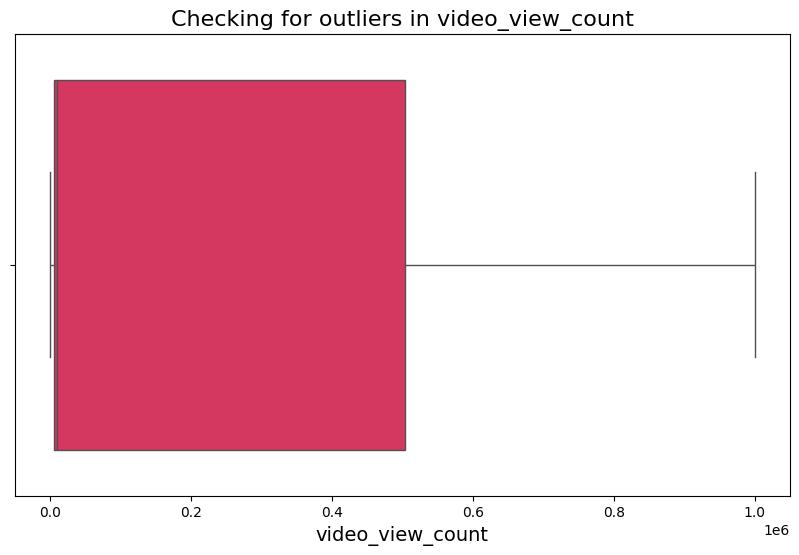


--------------------------------------------------------------------------------------------------------------------------------------------



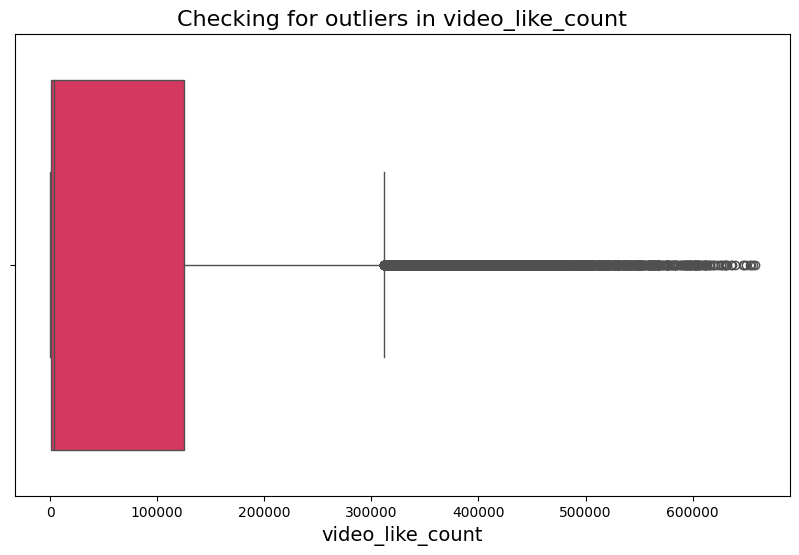


--------------------------------------------------------------------------------------------------------------------------------------------



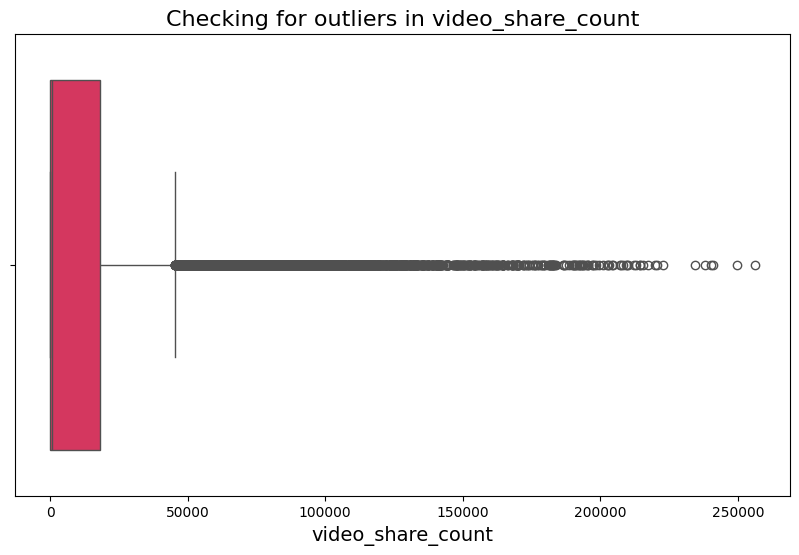


--------------------------------------------------------------------------------------------------------------------------------------------



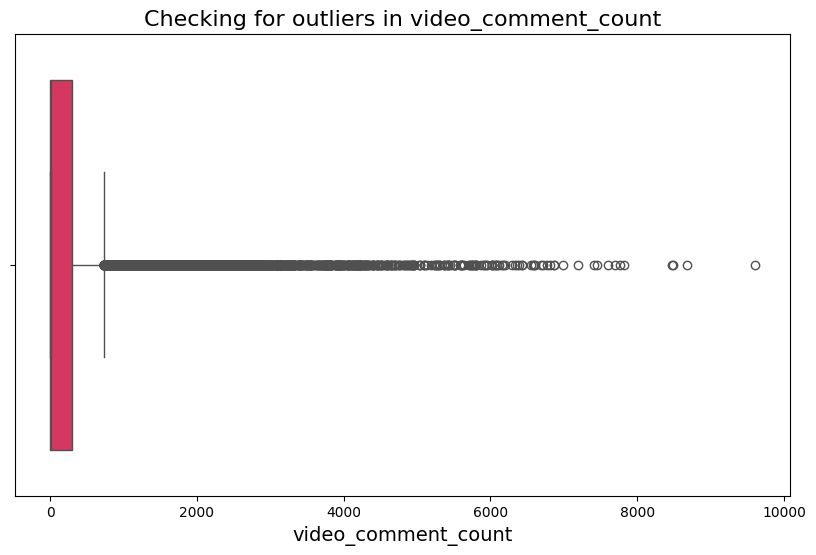


--------------------------------------------------------------------------------------------------------------------------------------------



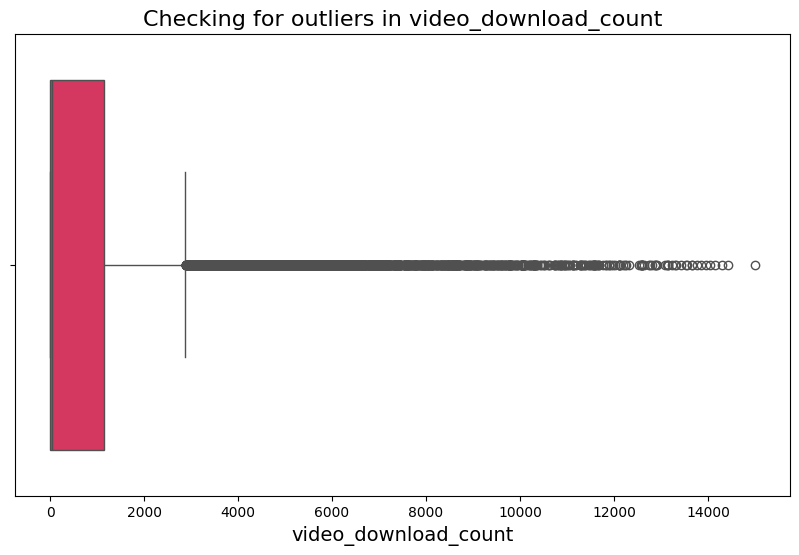

In [26]:
boxplot("video_duration_sec")
print("\n"+"-"*140+"\n")
boxplot("video_view_count")
print("\n"+"-"*140+"\n")
boxplot("video_like_count")
print("\n"+"-"*140+"\n")
boxplot("video_share_count")
print("\n"+"-"*140+"\n")
boxplot("video_comment_count")
print("\n"+"-"*140+"\n")
boxplot("video_download_count")

In [27]:

print("Median VS Mean to inspect the affect of outliers\n")
summary_df = numerical.agg(['mean', 'median']).transpose()
summary_df.columns = ['Mean', 'Median']

summary_df


Median VS Mean to inspect the affect of outliers



Mean        Median
video_id              5.624840e+09  5.609500e+09
video_duration_sec    3.242381e+01  3.200000e+01
video_view_count      2.547086e+05  9.954500e+03
video_like_count      8.430464e+04  3.403500e+03
video_share_count     1.673525e+04  7.170000e+02
video_download_count  1.049430e+03  4.600000e+01
video_comment_count   3.493121e+02  9.000000e+00

In [28]:

tiktok_data.loc[:,'Total Interactions'] = (
    tiktok_data['video_view_count'] +
    tiktok_data['video_like_count'] +
    tiktok_data['video_comment_count'] +
    tiktok_data['video_share_count']
)

C:\Users\mayar\AppData\Local\Temp\ipykernel_18208\2841247790.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tiktok_data.loc[:,'Total Interactions'] = (


In [29]:
# Calculating percentiles for thresholds
p25 = tiktok_data['Total Interactions'].quantile(0.25)  # 25th percentile
p75 = tiktok_data['Total Interactions'].quantile(0.75)  # 75th percentile
p95 = tiktok_data['Total Interactions'].quantile(0.95)  # 95th percentile


def classify_video(total_interactions):
    if total_interactions >= p95:
        return 'Viral'
    elif total_interactions >= p75:
        return 'Popular'
    elif total_interactions >= p25:
        return 'Typical'
    else:
        return 'Unpopular'


tiktok_data['Video Classification'] =tiktok_data['Total Interactions'].apply(classify_video)



# Count the number of videos in each category
classification_counts=tiktok_data['Video Classification'].value_counts()
print("Counts of each classification:")
print(classification_counts)


Counts of each classification:
Video Classification
Typical      9542
Unpopular    4771
Popular      3816
Viral         955
Name: count, dtype: int64


C:\Users\mayar\AppData\Local\Temp\ipykernel_18208\3877822777.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tiktok_data['Video Classification'] =tiktok_data['Total Interactions'].apply(classify_video)


In [30]:
tiktok_data.head()

claim_status    video_id  video_duration_sec verified_status  \
0        claim  7017666017                  59    not verified   
1        claim  4014381136                  32    not verified   
2        claim  9859838091                  31    not verified   
3        claim  1866847991                  25    not verified   
4        claim  7105231098                  19    not verified   

  author_ban_status  video_view_count  video_like_count  video_share_count  \
0      under review          343296.0           19425.0              241.0   
1            active          140877.0           77355.0            19034.0   
2            active          902185.0           97690.0             2858.0   
3            active          437506.0          239954.0            34812.0   
4            active           56167.0           34987.0             4110.0   

   video_download_count  video_comment_count  Total Interactions  \
0                   1.0                  0.0            362962.0   
1                1161.0                684.0            237950.0   
2                 833.0                329.0           1003062.0   
3                1234.0                584.0            712856.0   
4                 547.0                152.0             95416.0   

  Video Classification  
0              Typical  
1              Typical  
2              Popular  
3              Popular  
4              Typical

In [31]:
tiktok_data.to_csv("clean_tiktok_dataset.csv")

# Influencers Dataset

## Profiling

### Structure Discovery

In [46]:
influencers_data.shape

(50, 7)

In [47]:
influencers_data.columns

Index(['Rank', 'Username', 'Owner', 'Followers(millions)', 'Likes(billions)',
       'Description', 'Country'],
      dtype='object')

In [48]:
influencers_data.head()

Rank        Username            Owner  Followers(millions)  \
0     1     @khaby.lame     Khabane Lame                162.2   
1     2  @charlidamelio  Charli D'Amelio                151.6   
2     3    @bellapoarch     Bella Poarch                 93.4   
3     4        @mrbeast          MrBeast                 89.2   
4     5      @addisonre      Addison Rae                 88.8   

   Likes(billions)                          Description  \
0             2.40             Social media personality   
1            11.50  Dancer and social media personality   
2             2.30  Singer and social media personality   
3             0.88             Social media personality   
4             5.80  Social media personality and dancer   

                      Country  
0               Italy Senegal  
1               United States  
2  Philippines  United States  
3               United States  
4                         NaN

In [49]:
influencers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 50 non-null     int64  
 1   Username             50 non-null     object 
 2   Owner                50 non-null     object 
 3   Followers(millions)  50 non-null     float64
 4   Likes(billions)      50 non-null     float64
 5   Description          50 non-null     object 
 6   Country              37 non-null     object 
dtypes: float64(2), int64(1), object(4)
memory usage: 2.9+ KB


In [50]:
influencers_data.describe()

Rank  Followers(millions)  Likes(billions)
count  50.00000            50.000000        50.000000
mean   25.50000            58.184000         1.762400
std    14.57738            25.190048         1.820001
min     1.00000            38.300000         0.260000
25%    13.25000            43.000000         0.750000
50%    25.50000            50.550000         1.300000
75%    37.75000            62.250000         2.100000
max    50.00000           162.200000        11.500000

In [45]:
unique = [col for col in influencers_data.columns if influencers_data[col].nunique() == len(influencers_data)]
unique

['Rank', 'Username', 'Owner']

### Content Discovery

In [51]:
influencers_data.isna().sum()

Rank                    0
Username                0
Owner                   0
Followers(millions)     0
Likes(billions)         0
Description             0
Country                13
dtype: int64

In [52]:
influencers_data.duplicated().sum()

0

In [64]:
nan_countries = influencers_data[influencers_data['Country'].isna()]
nan_countries['Owner']


4             Addison Rae
10               The Rock
14           Jason Derulo
15         Dixie D'Amelio
18           Kylie Jenner
19             Loren Gray
21           Younes Zarou
33           Joe Albanese
34              Junya Gou
35    Pongámoslo a Prueba
36            Avani Gregg
37          Rod Contreras
38              Ria Ricis
Name: Owner, dtype: object

In [68]:
zero_values = (influencers_data == 0).sum(axis=0)
print("Zero values in each column:")
print(zero_values)


Zero values in each column:
Rank                   0
Username               0
Owner                  0
Followers(millions)    0
Likes(billions)        0
Description            0
Country                0
dtype: int64


### Relationship Discovery

In [73]:
numerical=influencers_data.select_dtypes(include=['float','int'])
correlation_matrix=numerical.corr()
correlation_matrix

Rank  Followers(millions)  Likes(billions)
Rank                 1.000000            -0.783303        -0.380981
Followers(millions) -0.783303             1.000000         0.579143
Likes(billions)     -0.380981             0.579143         1.000000

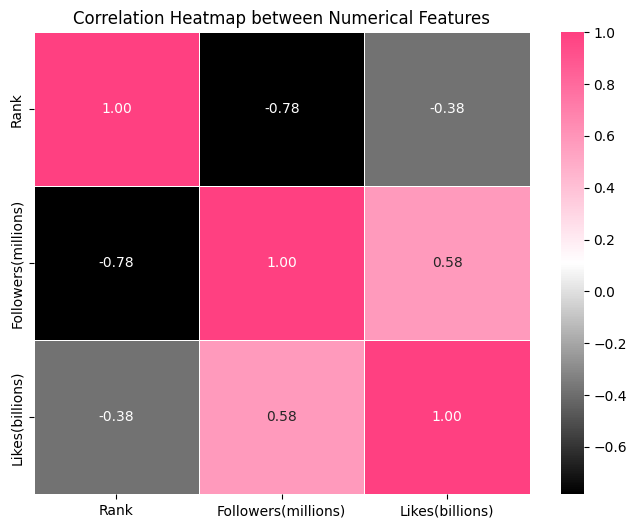

In [74]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap=tiktok_colors, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap between Numerical Features')
plt.show()

## Data Wrangling

In [75]:
#mapping useres to countries based on reserach
username_to_country = {
    '@addisonre': 'United States',
    '@therock': 'United States',
    '@jasonderulo': 'United States',
    '@dixiedamelio': 'United States',
    '@kyliejenner': 'United States',
    '@lorengray': 'United States',
    '@youneszarou': 'Germany',
    '@joealbanese': 'United States',
    '@junya1gou': 'Japan',
    '@pongamoslo_a_prueba': 'Mexico',
    '@avani': 'United States',
    '@elrodcontreras': 'Mexico',
    '@riaricis': 'Indonesia'
}


influencers_data['Country'] = influencers_data.apply(
    lambda row: username_to_country[row['Username']] if pd.isna(row['Country']) else row['Country'],
    axis=1
)


influencers_data.isna().sum()


Rank                   0
Username               0
Owner                  0
Followers(millions)    0
Likes(billions)        0
Description            0
Country                0
dtype: int64

In [76]:
influencers_data.head()

Rank        Username            Owner  Followers(millions)  \
0     1     @khaby.lame     Khabane Lame                162.2   
1     2  @charlidamelio  Charli D'Amelio                151.6   
2     3    @bellapoarch     Bella Poarch                 93.4   
3     4        @mrbeast          MrBeast                 89.2   
4     5      @addisonre      Addison Rae                 88.8   

   Likes(billions)                          Description  \
0             2.40             Social media personality   
1            11.50  Dancer and social media personality   
2             2.30  Singer and social media personality   
3             0.88             Social media personality   
4             5.80  Social media personality and dancer   

                      Country  
0               Italy Senegal  
1               United States  
2  Philippines  United States  
3               United States  
4               United States

In [78]:
def boxplot(column):
    plt.figure(figsize=(10, 6)) 
    ax = sns.boxplot(data= tiktok_data, x=numerical[f"{column}"], color="#EE1D52")  
    plt.title(f"Checking for outliers in {column}", fontsize=16)  
    plt.xlabel(column, fontsize=14)  
    plt.show()

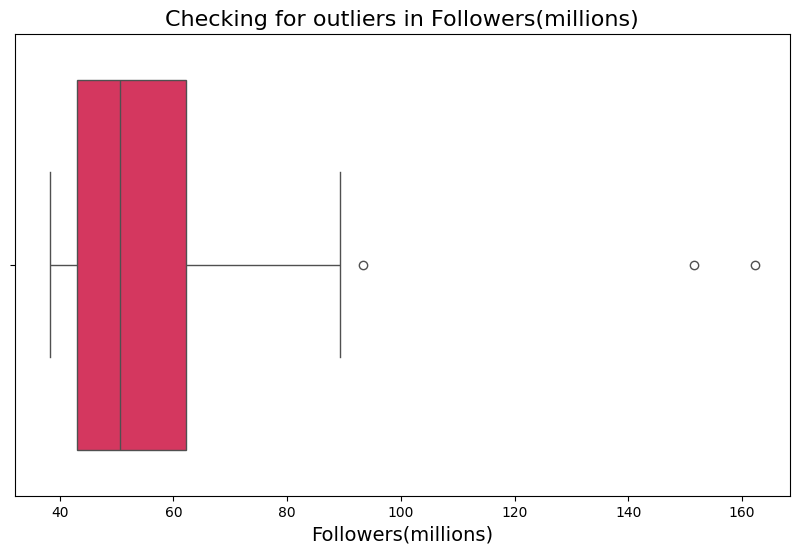


--------------------------------------------------------------------------------------------------------------------------------------------



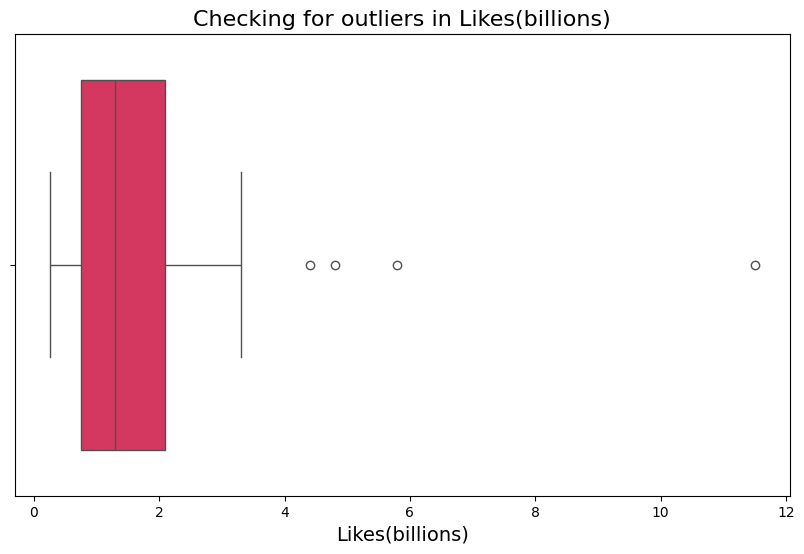


--------------------------------------------------------------------------------------------------------------------------------------------



In [80]:
boxplot('Followers(millions)')
print("\n"+"-"*140+"\n")
boxplot('Likes(billions)')
print("\n"+"-"*140+"\n")

In [84]:
influencers_data.to_csv("clean_influencers_data.csv")